In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
from matplotlib import colors
import seaborn as sns; sns.set()
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("titanic.csv")

In [ ]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
one=df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')

In [ ]:
one.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [ ]:
two = one.drop('Survived',axis='columns')

In [ ]:
surv = one.Survived

In [ ]:
dummies = pd.get_dummies(two.Sex)
dummies.head(5)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
two = pd.concat([two,dummies],axis='columns')
two.head(5)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [ ]:
two.drop(['Sex','male'],axis='columns',inplace=True)
two.head(5)

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [ ]:
two.columns[two.isna().any()]

Index(['Age'], dtype='object')

In [ ]:
two.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [ ]:
two.Age = two.Age.fillna(two.Age.mean())
two.head(5)

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [ ]:
two.corr()

,Pclass,Age,Fare,female
Pclass,1.000000,-0.331339,-0.549500,-0.131900
Age,-0.331339,1.000000,0.091566,-0.084153
Fare,-0.549500,0.091566,1.000000,0.182333
female,-0.131900,-0.084153,0.182333,1.000000


Text(0.5, 1.0, 'Correlation among features')

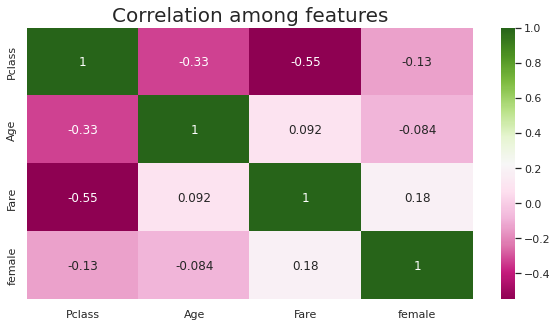

In [ ]:
plt.subplots(figsize = (10,5))
sns.heatmap(two.corr(), annot=True,cmap="PiYG")
plt.title("Correlation among features" , fontsize = 20)

In [ ]:
one['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


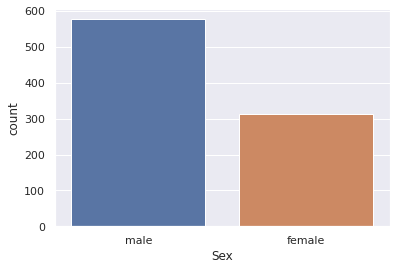

In [ ]:
sns.countplot('Sex', data=one)

In [ ]:
one['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


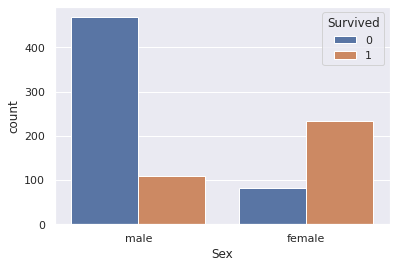

In [ ]:
sns.countplot('Sex', hue='Survived', data=one)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(two,surv,test_size=0.2)
titan = GaussianNB()
titan.fit(X_train,y_train)
print("Naive Bayes score: ",titan.score(X_test, y_test))

Naive Bayes score:  0.7597765363128491


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(two,surv,test_size=0.2)
BernNB=BernoulliNB(binarize=True)
BernNB.fit(X_train,y_train)
print(BernNB)
y_expect=y_test
y_pred=BernNB.predict(X_test)
print(accuracy_score(y_expect,y_pred))

BernoulliNB(binarize=True)
0.6759776536312849


In [ ]:
X_test[0:10]

,Pclass,Age,Fare,female
602,1,29.699118,42.4000,0
392,3,28.000000,7.9250,0
166,1,29.699118,55.0000,1
395,3,22.000000,7.7958,0
578,3,29.699118,14.4583,1
730,1,29.000000,211.3375,1
18,3,31.000000,18.0000,1
17,2,29.699118,13.0000,0
711,1,29.699118,26.5500,0
21,2,34.000000,13.0000,0


In [ ]:
y_test[0:10]

602    0
392    0
166    1
395    0
578    0
730    1
18     0
17     1
711    0
21     1
Name: Survived, dtype: int64

In [ ]:
titan.predict(X_test[0:10])

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
titan.predict_proba(X_test[:10])

array([[7.28960602e-01, 2.71039398e-01],
       [9.65929564e-01, 3.40704362e-02],
       [4.48365262e-02, 9.55163474e-01],
       [9.62173933e-01, 3.78260674e-02],
       [4.10341603e-01, 5.89658397e-01],
       [1.01941372e-07, 9.99999898e-01],
       [4.11618265e-01, 5.88381735e-01],
       [9.27114096e-01, 7.28859044e-02],
       [7.72935814e-01, 2.27064186e-01],
       [9.29354639e-01, 7.06453611e-02]])

In [ ]:
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.7972028 , 0.78321678, 0.77464789, 0.77464789, 0.78873239])